# Laboratorium 2 - MOFIT


## Rozwiązywanie równań dynamiki Newtona z automatyczną kontrolą błędu i doborem kroku czasowego

### Krzysztof Tondera

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
sns.set()

au=149597870700
y=0.586*au
x=0
vx=54600 #m/s
vy=0
m_s=1.989e30 #kg
G=6.6741e-11 #m^3/kg/s^2

## Zad1

In [2]:
def ax(x,y):
    r=np.sqrt(x**2+y**2)
    return -G*m_s*x/r**3

def ay(x,y):
    r=np.sqrt(x**2+y**2)
    return -G*m_s*y/r**3

def position(r,v,dt):
    return r+v*dt

def velocity(v,a,dt):
    return v+a*dt

## Zad2

In [3]:
def fun_euler(x0,y0,vx0,vy0,dt):
    tab_x=[x0]
    tab_y=[y0]
    tab_t=[0]
    
    
    vx=vx0
    vy=vy0
    for i in range(int(365*24*3600*75*3/dt)):
        x = tab_x[-1]
        y = tab_y[-1]
        v_xn = velocity(vx, ax(x,y), dt)
        v_yn = velocity(vy, ay(x,y), dt)
        x_n = position(x, vx, dt)
        y_n = position(y, vy, dt)

        vy = v_yn
        vx = v_xn
        tab_x.append(x_n)
        tab_y.append(y_n)
        tab_t.append(tab_t[i]+dt)

    return tab_x,tab_y,tab_t

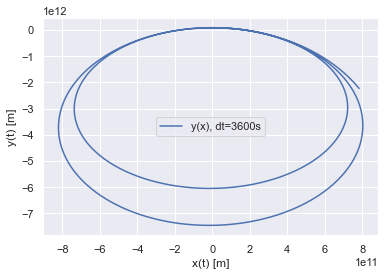

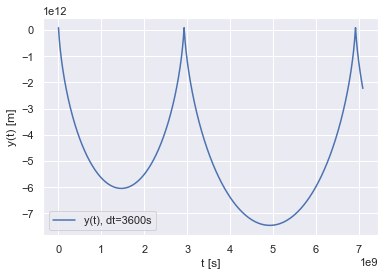

26.321943283081055 s


In [4]:
au=149597870700
y0=0.586*au
x0=0
vx=54600 #m/s
vy=0
m_s=1.989e30 #kg
G=6.6741e-11 #m^3/kg/s^2
dt=3600 #sekund

start = time.time()

x,y,t=fun_euler(x0,y0,vx,vy,dt)

plt.plot(x,y,'-',label="y(x), dt=3600s")
plt.xlabel("x(t) [m]")
plt.ylabel("y(t) [m]")
plt.legend()
plt.show()

plt.plot(t,y,label="y(t), dt=3600s")
plt.xlabel('t [s]')
plt.ylabel("y(t) [m]")
plt.legend()
plt.show()

end = time.time()
print("{} s".format(end - start))

## Zad3

In [5]:
def fun_RK4(x0,y0,vx,vy,dt):
    
    k_11=vx
    k_12=vy
    k_13=ax(x0,y0)
    k_14=ay(x0,y0)
    
    k_21=vx+dt*k_13/2
    k_22=vy+dt*k_14/2
    k_23=ax(x0+dt*k_11/2,y0+dt*k_12/2)
    k_24=ay(x0+dt*k_11/2,y0+dt*k_12/2)
    
    k_31=vx+dt*k_23/2
    k_32=vy+dt*k_24/2
    k_33=ax(x0+dt*k_21/2,y0+dt*k_22/2)
    k_34=ay(x0+dt*k_21/2,y0+dt*k_22/2)
    
    k_41=vx+dt*k_33
    k_42=vy+dt*k_34
    k_43=ax(x0+dt*k_31,y0+dt*k_32)
    k_44=ay(x0+dt*k_31,y0+dt*k_32)
    
    x_t=x0+dt*(k_11+2*k_21+2*k_31+k_41)/6
    y_t=y0+dt*(k_12+2*k_22+2*k_32+k_42)/6
    vx_t=vx+dt*(k_13+2*k_23+2*k_33+k_43)/6
    vy_t=vy+dt*(k_14+2*k_24+2*k_34+k_44)/6
    
    return x_t,y_t,vx_t,vy_t
    
    
def calc_RK4(x0,y0,vx0,vy0,dt):
    tab_x=[x0]
    tab_y=[y0]
    tab_t=[0]
    
    
    vx=vx0
    vy=vy0
    for i in range(int(365*24*3600*75*3/dt)):
        x = tab_x[-1]
        y = tab_y[-1]
        
        x_n,y_n,vx,vy=fun_RK4(x,y,vx,vy,dt)
        
        tab_x.append(x_n)
        tab_y.append(y_n)
        tab_t.append(tab_t[i]+dt)

    return tab_x,tab_y,tab_t
    

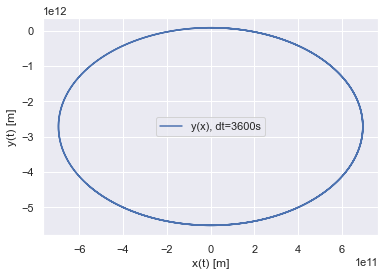

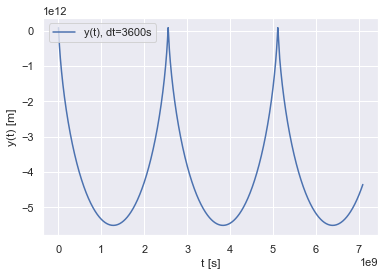

100.60379314422607 s


In [6]:
au=149597870700
y0=0.586*au
x0=0
vx=54600 #m/s
vy=0
m_s=1.989e30 #kg
G=6.6741e-11 #m^3/kg/s^2
dt=3600 #sekund

start = time.time()

x,y,t=calc_RK4(x0,y0,vx,vy,dt)

plt.plot(x,y,'-',label="y(x), dt=3600s")
plt.xlabel("x(t) [m]")
plt.ylabel("y(t) [m]")
plt.legend()
plt.show()

plt.plot(t,y,label="y(t), dt=3600s")
plt.xlabel('t [s]')
plt.ylabel("y(t) [m]")
plt.legend()
plt.show()

end = time.time()
print("{} s".format(end - start))

## Zad4

In [36]:
def fun_euler_at(tol,x0,y0,vx0,vy0,dt0):
    tab_x=[x0]
    tab_y=[y0]
    tab_t=[0]
    tab_dt=[dt0]
    
    t=0
    c=0.9
    n=1 #w metodzie Eulera
    vx=vx0
    vy=vy0
    dt=dt0
    
    while(365*24*3600*75*3>t):
        x = tab_x[-1]
        y = tab_y[-1]
        
        x1=position(x,vx,dt)
        y1=position(y,vy,dt)

        x2=position(x,vx,dt/2)
        y2=position(y,vy,dt/2)
        
        vx2=velocity(vx,ax(x,y),dt/2)
        vy2=velocity(vy,ay(x,y),dt/2)

        x3=position(x2,vx2,dt/2)
        y3=position(y2,vy2,dt/2)

        eps_x=(x3-x1)/(2**n-1)
        eps_y=(y3-y1)/(2**n-1)
            
        if abs(eps_x)>abs(eps_y):
            eps=eps_x
        else:
            eps=eps_y
            
        if eps<=tol:
            tab_x.append(x1)
            tab_y.append(y1)
            tab_t.append(tab_t[-1]+dt)
            tab_dt.append(dt)
            vx=velocity(vx,ax(x,y),dt)
            vy=velocity(vy,ay(x,y),dt)
            t+=dt
            
        dt=c*dt*abs(tol/eps)**(1/(n+1))
    return tab_x,tab_y,tab_t,tab_dt 

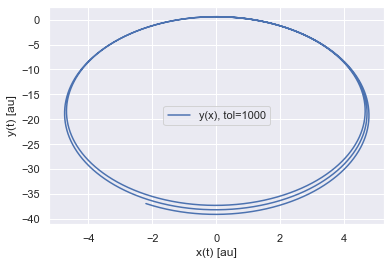

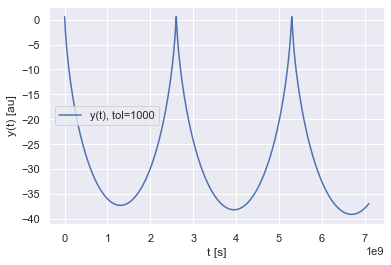

12.402958631515503s


In [37]:
au=149597870700
y0=0.586*au
x0=0
vx=54600 #m/s
vy=0
m_s=1.989e30 #kg
G=6.6741e-11 #m^3/kg/s^2
dt=3600 #sekund
tol=[1000,1]

start = time.time()

x,y,t,tab_dt=fun_euler_at(tol[0],x0,y0,vx,vy,dt)

x=np.array(x)/au
y=np.array(y)/au
tab_dt1=np.array(tab_dt)/(3600*24)

r1=np.sqrt(x**2+y**2)

plt.plot(x,y,'-',label="y(x), tol={}".format(tol[0]))
plt.xlabel("x(t) [au]")
plt.ylabel("y(t) [au]")
plt.legend()
plt.show()

plt.plot(t,y,label="y(t), tol={}".format(tol[0]))
plt.xlabel('t [s]')
plt.ylabel("y(t) [au]")
plt.legend()
plt.show()

stop=time.time()
print("{}s".format(stop-start))

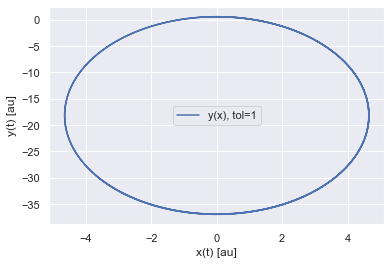

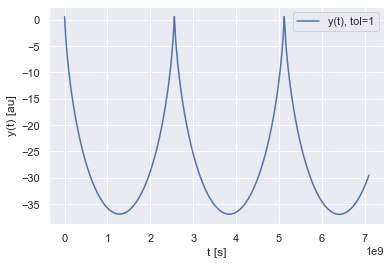

381.7903776168823s


In [38]:
start=time.time()
x,y,t,tab_dt=fun_euler_at(tol[1],x0,y0,vx,vy,dt)

x=np.array(x)/au
y=np.array(y)/au
tab_dt2=np.array(tab_dt)/(3600*24)

r2=np.sqrt(x**2+y**2)

plt.plot(x,y,'-',label="y(x), tol={}".format(tol[1]))
plt.xlabel("x(t) [au]")
plt.ylabel("y(t) [au]")
plt.legend()
plt.show()

plt.plot(t,y,label="y(t), tol={}".format(tol[1]))
plt.xlabel('t [s]')
plt.ylabel("y(t) [au]")
plt.legend()
plt.show()

stop=time.time()
print("{}s".format(stop-start))

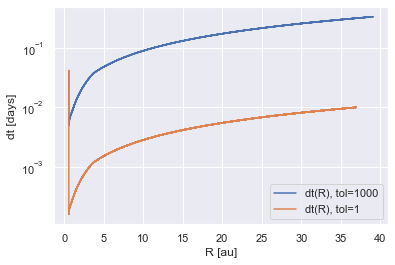

In [39]:
plt.plot(r1,tab_dt1,label="dt(R), tol={}".format(tol[0]))
plt.plot(r2,tab_dt2,label="dt(R), tol={}".format(tol[1]))
plt.xlabel('R [au]')
plt.ylabel("dt [days]")
plt.yscale('log')
plt.legend()
plt.show()

## Zad5

In [40]:
def fun_RK4_at(tol,x0,y0,vx0,vy0,dt0):
    tab_x=[x0]
    tab_y=[y0]
    tab_t=[0]
    tab_dt=[dt0]
    
    t=0
    c=0.9
    n=4 #w metodzie RK4
    vx=vx0
    vy=vy0
    dt=dt0
    
    while(365*24*3600*75*3>t):
        x = tab_x[-1]
        y = tab_y[-1]
        
        x1,y1,vx1,vy1=fun_RK4(x,y,vx,vy,dt)
        
        x2,y2,vx2,vy2=fun_RK4(x,y,vx,vy,dt/2)
        
        x3,y3,vx3,vy3=fun_RK4(x2,y2,vx2,vy2,dt/2)

        eps_x=(x3-x1)/(2**n-1)
        eps_y=(y3-y1)/(2**n-1)
            
        if abs(eps_x)>abs(eps_y):
            eps=eps_x
        else:
            eps=eps_y
            
        if eps<=tol:
            tab_x.append(x1)
            tab_y.append(y1)
            tab_t.append(tab_t[-1]+dt)
            tab_dt.append(dt)
            vx=vx1
            vy=vy1
            t+=dt
            
        dt=c*dt*abs(tol/eps)**(1/(n+1))
    return tab_x,tab_y,tab_t,tab_dt 

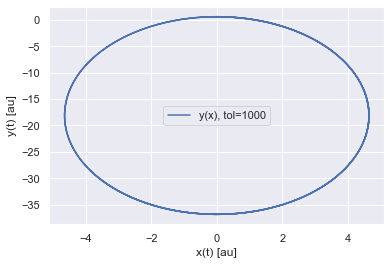

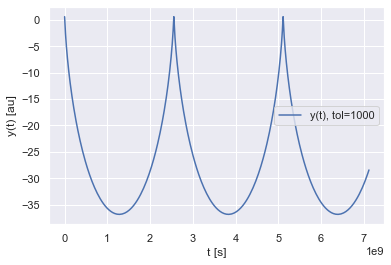

2.9683971405029297s


In [41]:
au=149597870700
y0=0.586*au
x0=0
vx=54600 #m/s
vy=0
m_s=1.989e30 #kg
G=6.6741e-11 #m^3/kg/s^2
dt=36000 #sekund
tol=[1000,1]

start = time.time()

x,y,t,tab_dt=fun_RK4_at(tol[0],x0,y0,vx,vy,dt)

x=np.array(x)/au
y=np.array(y)/au
tab_dt1=np.array(tab_dt)/(3600*24)

r1=np.sqrt(x**2+y**2)

plt.plot(x,y,'-',label="y(x), tol={}".format(tol[0]))
plt.xlabel("x(t) [au]")
plt.ylabel("y(t) [au]")
plt.legend()
plt.show()

plt.plot(t,y,label="y(t), tol={}".format(tol[0]))
plt.xlabel('t [s]')
plt.ylabel("y(t) [au]")
plt.legend()
plt.show()

stop=time.time()
print("{}s".format(stop-start))

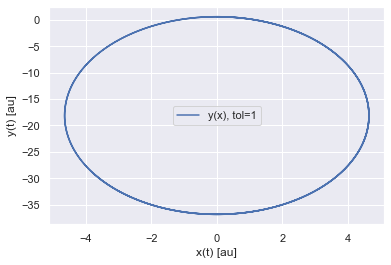

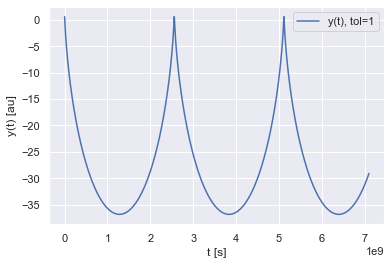

0.7163519859313965s


In [42]:
start=time.time()
x,y,t,tab_dt=fun_RK4_at(tol[1],x0,y0,vx,vy,dt)

x=np.array(x)/au
y=np.array(y)/au
tab_dt2=np.array(tab_dt)/(3600*24)

r2=np.sqrt(x**2+y**2)

plt.plot(x,y,'-',label="y(x), tol={}".format(tol[1]))
plt.xlabel("x(t) [au]")
plt.ylabel("y(t) [au]")
plt.legend()
plt.show()

plt.plot(t,y,label="y(t), tol={}".format(tol[1]))
plt.xlabel('t [s]')
plt.ylabel("y(t) [au]")
plt.legend()
plt.show()

stop=time.time()
print("{}s".format(stop-start))

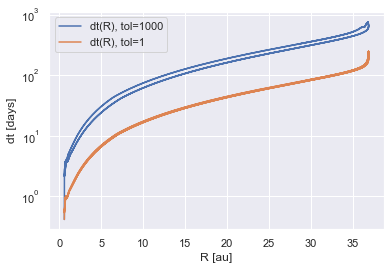

In [43]:
plt.plot(r1,tab_dt1,label="dt(R), tol={}".format(tol[0]))
plt.plot(r2,tab_dt2,label="dt(R), tol={}".format(tol[1]))
plt.xlabel('R [au]')
plt.ylabel("dt [days]")
plt.yscale('log')
plt.legend()
plt.show()